In [107]:
%pylab inline
from matplotlib import pyplot as plt
from pathlib import Path
import h5py
import os
import time
from skimage.color import label2rgb
import skimage
rc('figure', dpi=96)

Populating the interactive namespace from numpy and matplotlib


In [4]:
# I forgot to save the wavenumbers in the .h5 file.... whoops
wn = np.linspace(898.665771, 3801.009033, 1506)

#fpath = Path('/mnt/spinner/breast/shachi/BR1003_hdf5')
fpath = Path('E:')
cores = h5py.File(fpath / 'cores.h5', 'r')


# wn[394] ~= 1658; use this for visualization
widx = 750
print("wn[widx] = {0}".format(wn[widx]))

wn[widx] = 2345.0162337906977


In [5]:
# the IR images are inside 'spectra';  they are labeled  'core_XX' 
print(list(cores['spectra'].keys())[:5])

# cores['spectra']['core_XX'] is the (X, Y, Wavenum) IR array 
print(cores['spectra']['core_0'].shape)

# but the (X,Y) dims are not necessarily the same:
print(cores['spectra']['core_1'].shape)

['core_0', 'core_1', 'core_10', 'core_11', 'core_12']
(991, 946, 1506)
(1200, 800, 1506)


In [24]:
import cv2

In [25]:
ir_path = 'E:\\transfer_roi\\ir\\0'

In [40]:
#traverse through all cores
widx = 400 #consider the wavenumber index of 400
for cidx in range(100):
    f_n = os.path.join(ir_path, str(cidx)+".tif")
    im = np.clip(cores['spectra']['core_{}'.format(cidx)][:, :, widx], 0, 255)
    cv2.imwrite(f_n, im)

KeyError: "Unable to open object (object 'core_99' doesn't exist)"

In [96]:
def save_image_to_folder(img, folder, file_name):
    file_path = os.path.join(folder, file_name)
    cv2.imwrite(img, file_path)

In [97]:
print(list(cores['6_class_masks']))
masks = cores['6_class_masks']
print(list(masks['stroma'].keys())[-5:])  # contains all of the cores again

['dysplasiaepi', 'hyperplasiaepi', 'malignantepi', 'normalepi', 'others', 'stroma']
['94', '95', '96', '97', '98']


In [109]:
mask_folder = 'E:\\transfer_roi\\ir_mask'
for cidx in range(99):
    X = np.zeros(masks['stroma']['{}'.format(cidx)].shape)
    for i, cl in enumerate(masks):
        X += (i+1) * masks[cl]['{}'.format(cidx)][:]
    X = label2rgb (X, bg_label = 0)
    print(X.shape)
    file_name = os.path.join(mask_folder, 'ir_mask_core{}.tif'.format(cidx))
    plt.imsave(file_name, X)

(991, 946, 3)
(1200, 800, 3)
(974, 1015, 3)
(928, 1000, 3)
(891, 853, 3)
(959, 995, 3)
(968, 953, 3)
(1113, 843, 3)
(1056, 976, 3)
(1001, 1048, 3)
(1048, 982, 3)
(975, 994, 3)
(1124, 988, 3)
(1039, 1041, 3)
(1008, 1003, 3)
(1005, 1133, 3)
(940, 1069, 3)
(1145, 1011, 3)
(1164, 950, 3)
(1031, 987, 3)
(935, 993, 3)
(978, 1113, 3)
(930, 935, 3)
(924, 734, 3)
(889, 1068, 3)
(1083, 866, 3)
(972, 1109, 3)
(1116, 1000, 3)
(982, 1004, 3)
(900, 1047, 3)
(950, 1097, 3)
(999, 1064, 3)
(1098, 1061, 3)
(1095, 982, 3)
(1098, 990, 3)
(926, 1100, 3)
(1112, 1000, 3)
(1070, 1048, 3)
(904, 1107, 3)
(954, 972, 3)
(969, 903, 3)
(965, 941, 3)
(959, 954, 3)
(1036, 930, 3)
(986, 1074, 3)
(1005, 1004, 3)
(964, 947, 3)
(966, 960, 3)
(958, 992, 3)
(1078, 971, 3)
(969, 978, 3)
(1111, 1004, 3)
(948, 980, 3)
(960, 912, 3)
(973, 1071, 3)
(1066, 956, 3)
(946, 923, 3)
(1062, 912, 3)
(931, 1060, 3)
(1096, 1200, 3)
(1018, 988, 3)
(1019, 1078, 3)
(706, 1106, 3)
(981, 968, 3)
(1064, 1200, 3)
(1090, 1028, 3)
(956, 1039, 3)


In [103]:
mask_folder = 'E:\\transfer_roi\\ir_mask'
path = os.path.join(mask_folder, str(cidx) + ".tif")
print(path)

E:\transfer_roi\ir_mask\0.tif


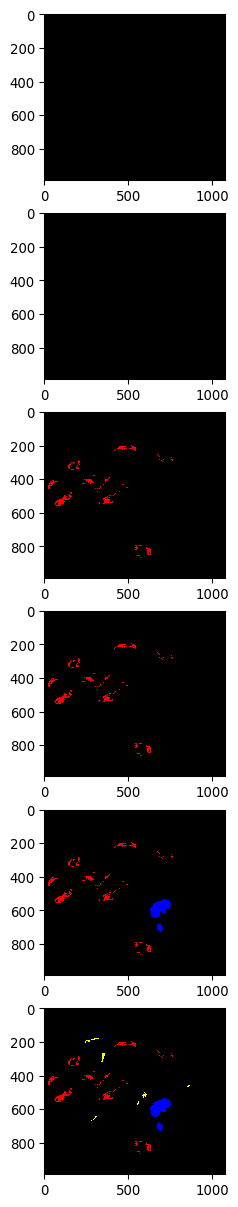

In [115]:
fig, ax = subplots(6, 1, figsize = (16,16))
cidx = 44
X = np.zeros(masks[cl]['{}'.format(cidx)].shape)
for i, cl in enumerate(masks):
    X += (i+1) * masks[cl]['{}'.format(cidx)][:]
    ax[i].imshow(label2rgb (X, bg_label = 0), cmap = 'gray', aspect = 'equal')

In [72]:
for i, cl in enumerate(masks):
    #X += (i+1) * masks[cl]['{}'.format(cidx)][:]
    print(i, cl)

0 dysplasiaepi
1 hyperplasiaepi
2 malignantepi
3 normalepi
4 others
5 stroma


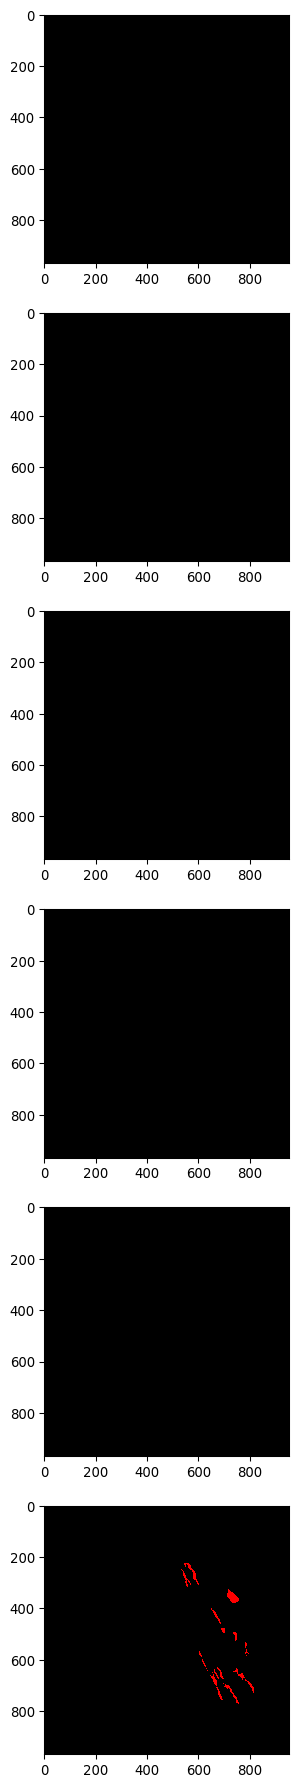

In [123]:
cidx = 6
#plt.figure(figsize = (16,24))
fig, ax = plt.subplots(6,1, figsize = (16,24))
X = np.zeros(masks['stroma']['{}'.format(cidx)].shape)
colors = ['red', 'blue', 'yellow', 'magenta', 'green', 'indigo']
for i, cl in enumerate(masks):
    X += (i+1) * masks[cl]['{}'.format(cidx)][:]
    ax[i].imshow(label2rgb (X, bg_label = 0 ), cmap = 'gray')
#label2rgb (X, image = sqrt(np.clip(ir, 0, 255)), bg_label = 0, alpha=0.5, image_alpha=1)

"\n#or use np.clip to make all negative value equal to zero \nfigure(figsize = (16,16));\nim = np.clip(cores['spectra']['core_0'][:, :, widx], 0, 255)\nimshow(im, aspect='equal', cmap='gray'); colorbar()\n"

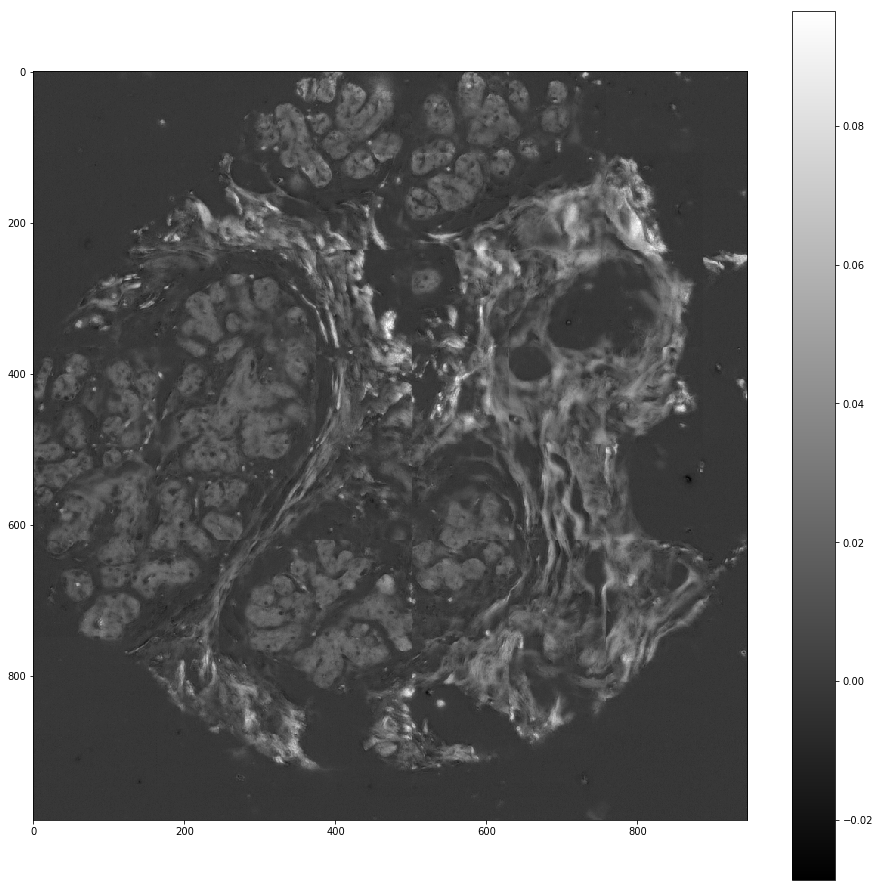

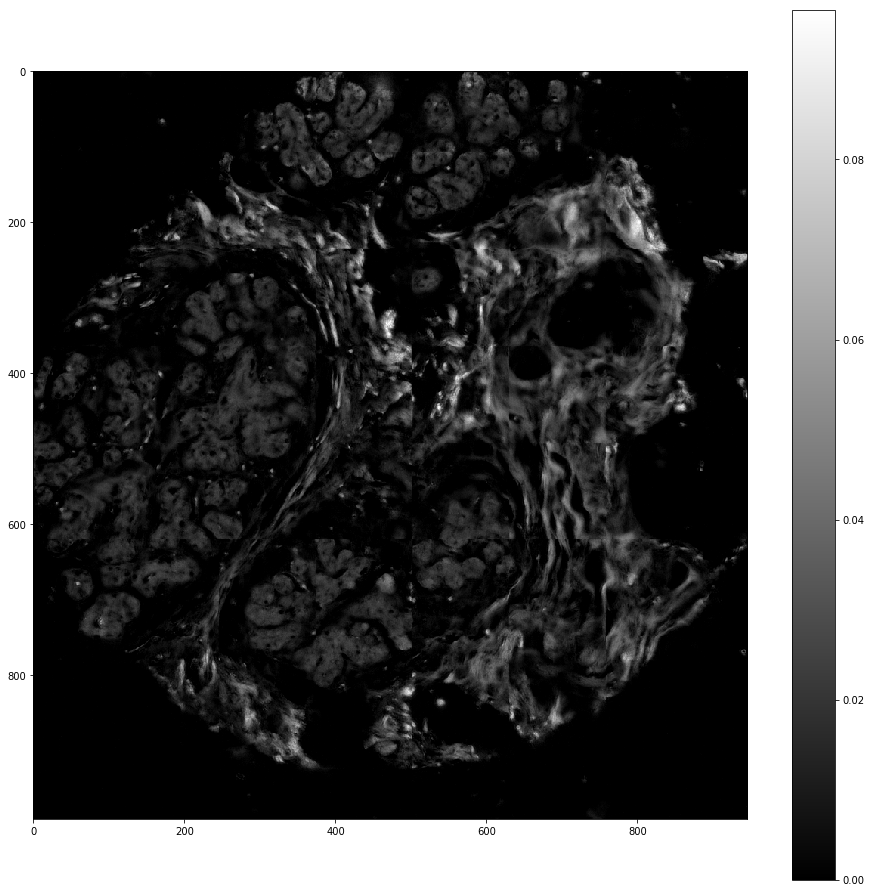

In [50]:
# this will look not-so-great because of a few wild pixels with negative values
widx = 1400
figure(figsize = (16,16));
imshow(cores['spectra']['core_0'][:, :, widx], aspect='equal', cmap='gray'); colorbar()


# easy enough to fix
figure(figsize = (16,16));
imshow(cores['spectra']['core_0'][:, :, widx], aspect='equal', cmap='gray', vmin=0); colorbar()

"""
#or use np.clip to make all negative value equal to zero 
figure(figsize = (16,16));
im = np.clip(cores['spectra']['core_0'][:, :, widx], 0, 255)
imshow(im, aspect='equal', cmap='gray'); colorbar()
"""

(832, 736, 4)


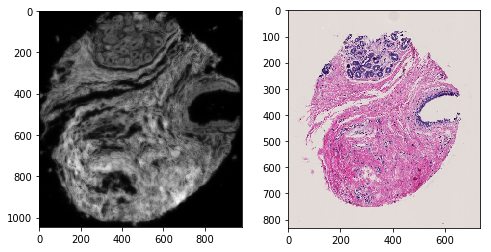

In [19]:
# The 'separate_he' script will break the HE.ndpi file out into individual images; 
# they are stored in "segmented_he" by default.
# the filename corresponds to the core index in cores.h5
#
# the subdirectories of segmented_he contain the various resolutions of the HE cores
# level i = downsample by 2^i
# 0 = full resolution
# 1 = half resolution
# 2 = 1/4 resolution..

he_path = Path('E:/segmented_he')
im_kwargs = dict(aspect='equal', cmap='gray', vmin=0)

#[ print(f"HE level{i}:" + str(imread(he_path / f"{i}" / f"{cidx}.tiff").shape)) for i in range(4)];

cidx = 10  # picked a random core idx
he = imread(he_path / "2" / '{}.tiff'.format(cidx))
print(he.shape)
fig, axs = subplots(1, 2, figsize=(8, 4))
axs[0].imshow(cores['spectra']['core_{}'.format(cidx)][..., widx], **im_kwargs)
axs[1].imshow(he, **im_kwargs)

## IR Annotations

In [17]:
# the IR "annotations" (really, labeled masks that Shachi provided) are in cores['6_class_masks']
print(list(cores['6_class_masks']))
masks = cores['6_class_masks']

['dysplasiaepi', 'hyperplasiaepi', 'malignantepi', 'normalepi', 'others', 'stroma']


['0', '1', '10', '11', '12']


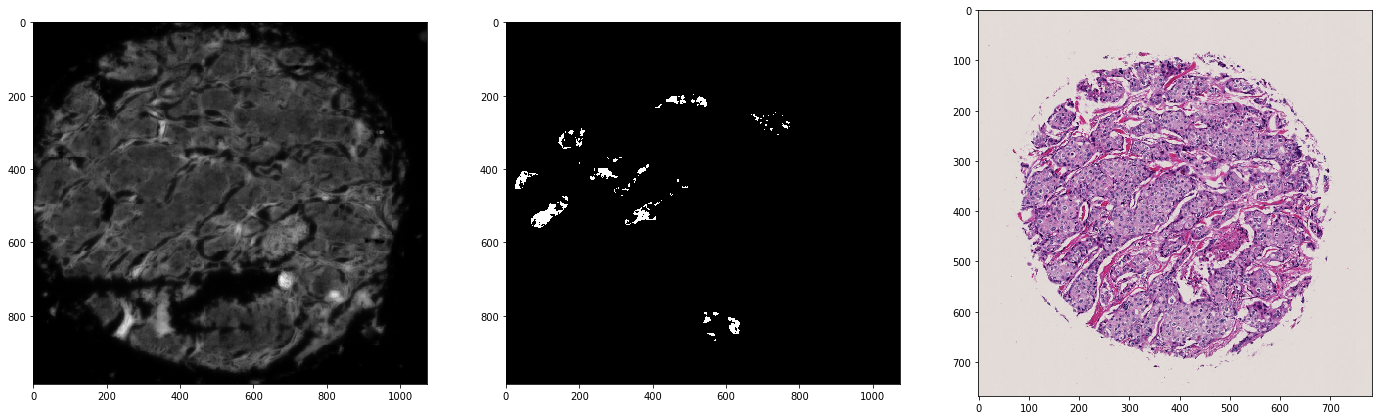

In [21]:
# Let's pick one of the classes as an example
print(list(masks['malignantepi'].keys())[:5])  # contains all of the cores again

cidx = 44
# this is the mask for core_44, class malignantepi. 
# it is just (X,Y).  No wavelength.  A binary mask.

fig, axs = subplots(1, 3, figsize=(24, 16))
#axs[0].imshow(cores['spectra']['core_{cidx}'][..., widx], **im_kwargs) #Python 3.6+=
axs[0].imshow(cores['spectra']['core_{}'.format(cidx)][..., widx], **im_kwargs)
axs[1].imshow(masks['malignantepi']['{}'.format(cidx)], **im_kwargs)
axs[2].imshow(imread(he_path / "2" / "{}.tiff".format(cidx)), aspect='equal')


C:\Users\cisl\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in sqrt
  if sys.path[0] == '':


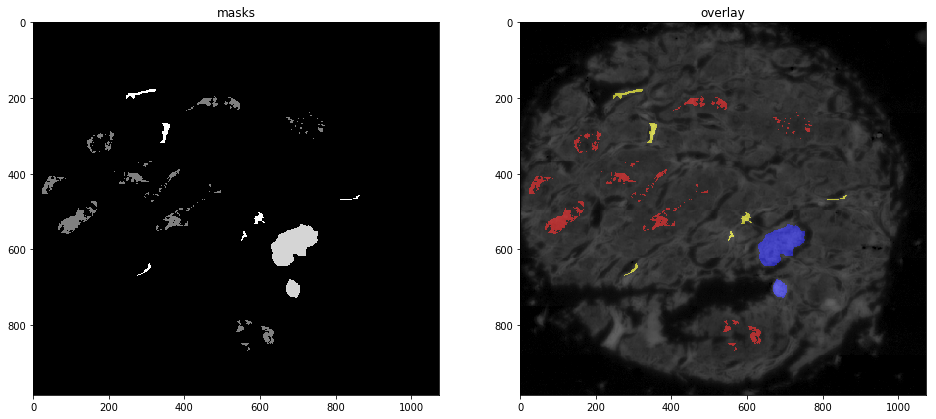

In [36]:

ir = cores['spectra']['core_{}'.format(cidx)][..., widx]

# build an array with all labels for a given core:
X = np.zeros(masks['stroma']['{}'.format(cidx)].shape)
for i, cl in enumerate(masks):
    X += (i+1) * masks[cl]['{}'.format(cidx)][:]  
    
fig, axs = subplots(1, 2, figsize=(16, 8))
axs[0].imshow(X, cmap='gray', aspect='equal')
axs[0].set_title('masks') ;
axs[1].imshow(label2rgb (X, image = sqrt(np.clip(ir, 0, 255)), bg_label = 0, alpha=0.5, image_alpha=1), aspect='equal')
axs[1].set_title('overlay');